In [1]:
FROM_CACHE = False

In [2]:
import winogender
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions
from transformers import GPT2Tokenizer
import json

## Winogender Results using Bergsma statistics (NOT filtering on odds ratio): 

In [3]:
model = Model(output_attentions=True)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
examples = winogender.load_examples()
interventions = [ex.to_intervention(tokenizer, 'bergsma') for ex in examples]

fname = 'winogender_data/attention_intervention_bergsma_results.json'
if not FROM_CACHE:
	results = perform_interventions(interventions, model)
	with open(fname, 'w') as f:
		json.dump(results, f)
with open(fname) as f:
	results = json.load(f)

100%|██████████| 44/44 [25:28<00:00, 34.75s/it]


### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 44
Mean total effect: 0.04

INDIRECT Effect (mean = 0.00024216305431919063)
Top 10 heads:
   5 10: 0.020595346437237986 (p=0.0000)
   5 8: 0.0062223937519857745 (p=0.0000)
   4 6: 0.00500662217713067 (p=0.0000)
   6 0: 0.004913297121964371 (p=0.0000)
   5 5: 0.003658652718575633 (p=0.0001)
   7 1: 0.0029938411147182624 (p=0.0010)
   3 4: 0.0016482126596987325 (p=0.0575)
   6 4: 0.001601487409536937 (p=0.0621)
   7 8: 0.0009765303163724391 (p=0.2026)
   6 3: 0.0009692072845527119 (p=0.2049)

DIRECT Effect (mean = 0.039518983959624165)
Top 10 heads:
   5 10: 0.01803861495996402 (p=0.1241)
   5 8: 0.03159917953466489 (p=0.3352)
   6 0: 0.033041228275661444 (p=0.3639)
   4 6: 0.033755599383518776 (p=0.3784)
   7 1: 0.035978569818491284 (p=0.4246)
   5 5: 0.03648451861756092 (p=0.4353)
   7 8: 0.0378794286463579 (p=0.4649)
   3 4: 0.038277715243483806 (p=0.4734)
   6 4: 0.03852284388532015 (p=0.4787)
   9 0: 0.03874356044583361 (p=0.4834)


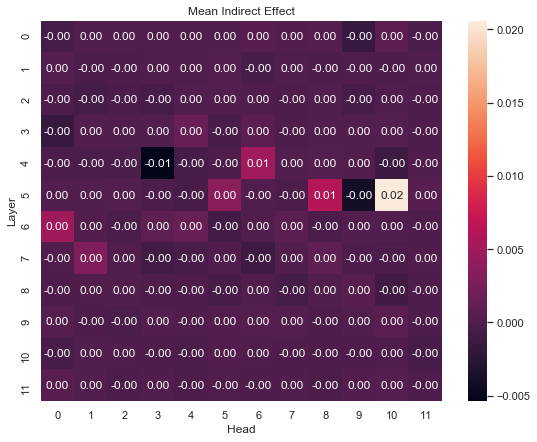

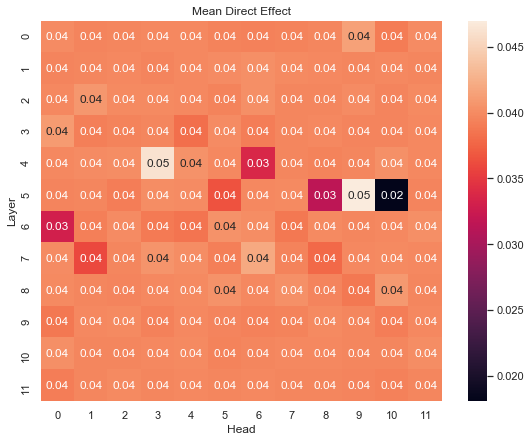

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 44
Mean total effect: 0.04


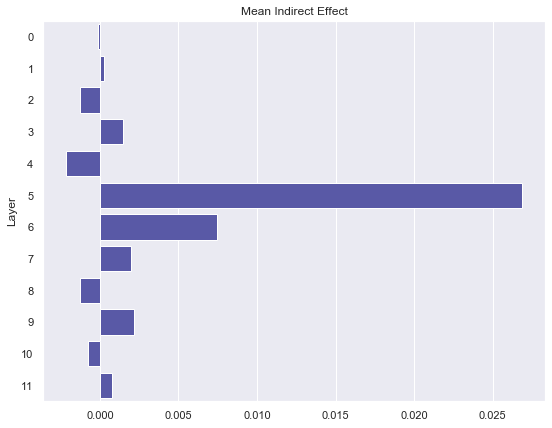

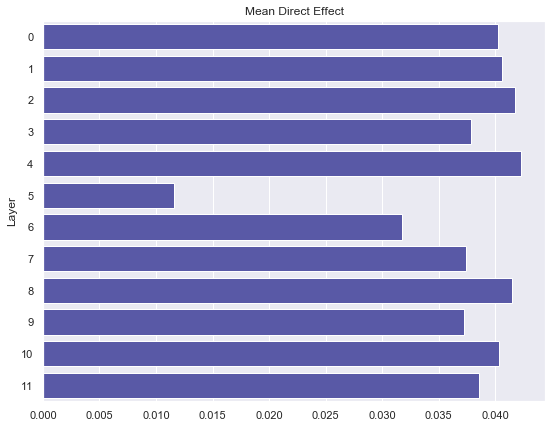

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The technician told the customer that she
x': The technician told the customer that he
c1: could pay with cash .
c2: had completed the repair .

p(c2|x) / p(c1|x) = 1.00914
p(c2|x') / p(c1|x') = 1.03421

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.025


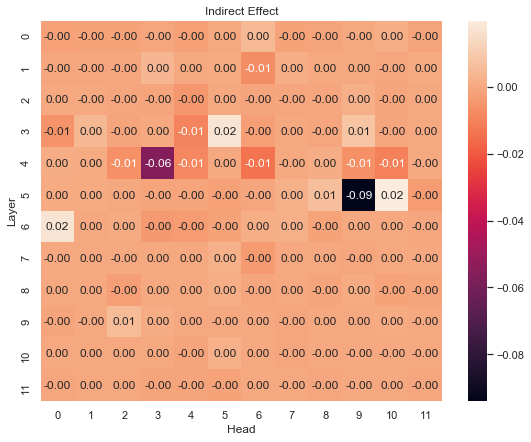

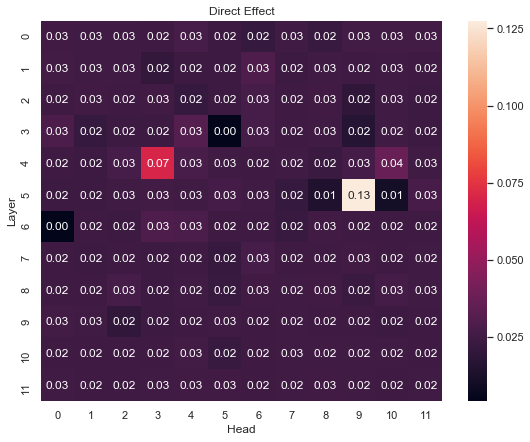

In [6]:
report_intervention(results[0])

x : The engineer informed the client that she
x': The engineer informed the client that he
c1: would need to make all future payments on time .
c2: would need more time to complete the project .

p(c2|x) / p(c1|x) = 3.13241
p(c2|x') / p(c1|x') = 3.31662

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.059


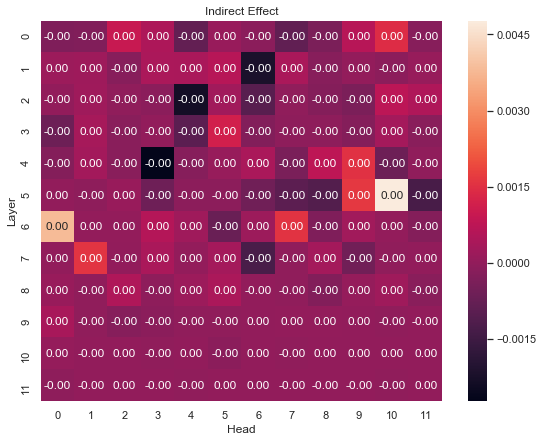

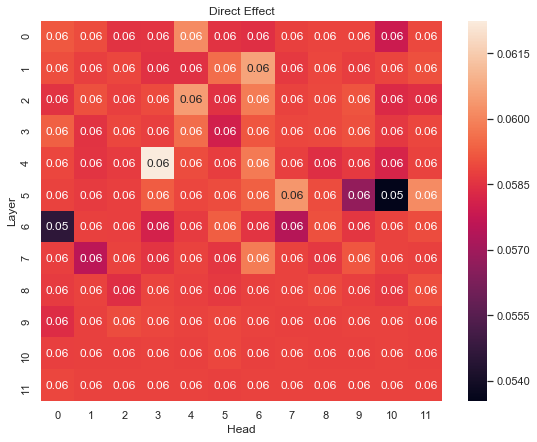

In [7]:
report_intervention(results[1])

x : The worker told the pedestrian that she
x': The worker told the pedestrian that he
c1: should avoid the closed portion of the street .
c2: was repairing the sidewalk as quickly as possible .

p(c2|x) / p(c1|x) = 1.06135
p(c2|x') / p(c1|x') = 1.10747

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.043


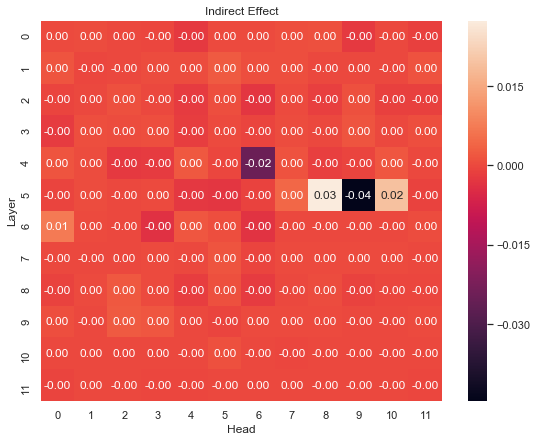

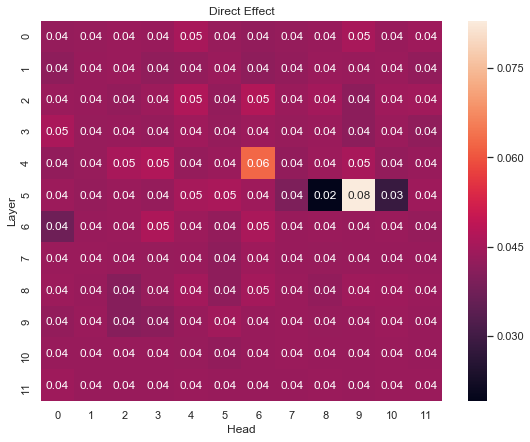

In [8]:
report_intervention(results[2])

x : The educator was meeting with a student to discuss her
x': The educator was meeting with a student to discuss his
c1: writing skills .
c2: grading policy .

p(c2|x) / p(c1|x) = 0.09221
p(c2|x') / p(c1|x') = 0.08209

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = -0.110


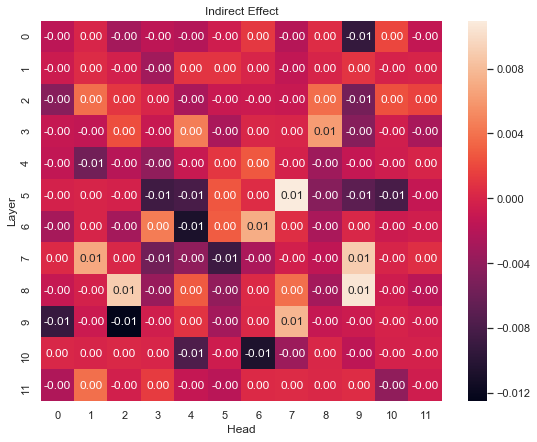

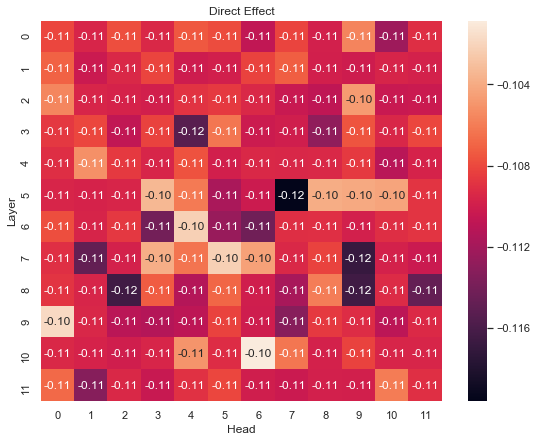

In [9]:
report_intervention(results[3])
